In [1]:
!pip install opendatasets --quiet

In [2]:
# по API подключаемся к kaggle и скачиваем нужный датасет
# для этого в colab надо подгрузить файл kaggle.json, который содержит токен и пароль
# после этого в проводнике colab появится папка с данными
import opendatasets as od
import pandas as pd

# {"username":"biwanun1690","key":"2d817845937a4e0f6a59358471001da7"}
od.download( "https://www.kaggle.com/competitions/automated-video-captioning")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: biwanun1690
Your Kaggle Key: ··········


100%|██████████| 1.08G/1.08G [00:07<00:00, 155MB/s] 



Extracting archive ./automated-video-captioning/automated-video-captioning.zip to ./automated-video-captioning


In [ ]:
import torch

device = "cuda" if torch.cuda.is_available() else "cpu"
train_csv_path = "/content/automated-video-captioning/train.csv"
test_csv_path = "/content/automated-video-captioning/test.csv"
train_dir = "/content/automated-video-captioning/train_videos"
test_dir = '/content/automated-video-captioning/test_videos'

## Предобработка

In [ ]:
train_csv = pd.read_csv(train_csv_path)
test_csv = pd.read_csv(test_csv_path)
print(train_csv.shape[0], test_csv.shape[0])
train_csv

603 521


,index,file_name,caption
0,0,0.mp4,A man is working out on a seated chest press m...
1,1,1.mp4,Preparing a bowl with yogurt and assorted fres...
2,2,2.mp4,A man with a muscular build is seen from behin...
3,3,3.mp4,Man exercising by jogging on a pedestrian brid...
4,4,4.mp4,Wristwatch hands moving forward close-up views.
...,...,...,...
598,598,598.mp4,Terrifying Halloween pumpkin with a carved evi...
599,599,599.mp4,Cheerful girl sending messages on cell phone w...
600,600,600.mp4,A person in a light blue shirt is using a lapt...
601,601,601.mp4,"A top-down view of an aesthetic desk setup, wi..."


In [ ]:
train_csv['caption'] = train_csv['caption'].str.lower()

train_csv['caption'] = train_csv['caption'].str.replace("\r", "")
train_csv['caption'] = train_csv['caption'].str.replace("\n", "")
train_csv['caption'] = train_csv['caption'].str.replace("    ", " ")

import string
string.punctuation
punct = list(string.punctuation)
for sign in punct:
    train_csv['caption'] = train_csv['caption'].str.replace(sign, "")

import nltk
nltk.download("stopwords")
from nltk.corpus import stopwords
eng_stopwords = stopwords.words("english")

train_csv['caption'] = train_csv['caption'].str.split()
train_csv['caption'] = train_csv['caption'].apply(lambda words: [w for w in words if w not in eng_stopwords])
train_csv['caption'] = train_csv['caption'].apply(lambda words: " ".join(words))

train_csv

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,index,file_name,caption
0,0,0.mp4,man working seated chest press machine modern ...
1,1,1.mp4,preparing bowl yogurt assorted freshly chopped...
2,2,2.mp4,man muscular build seen behind intensely worki...
3,3,3.mp4,man exercising jogging pedestrian bridge city ...
4,4,4.mp4,wristwatch hands moving forward closeup views
...,...,...,...
598,598,598.mp4,terrifying halloween pumpkin carved evil face ...
599,599,599.mp4,cheerful girl sending messages cell phone taki...
600,600,600.mp4,person light blue shirt using laptop green scr...
601,601,601.mp4,topdown view aesthetic desk setup smooth leftt...


In [ ]:
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

nltk.download('punkt_tab')
nltk.download('punkt')
nltk.download('wordnet')

wordnet_lem = WordNetLemmatizer()

def lemmatize_text(text):
    tokenization = nltk.word_tokenize(text)
    lemmatized_words = [wordnet_lem.lemmatize(word) for word in tokenization]
    return " ".join(lemmatized_words)

train_csv['caption'] = train_csv['caption'].apply(lemmatize_text)

train_csv

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,index,file_name,caption
0,0,0.mp4,man working seated chest press machine modern ...
1,1,1.mp4,preparing bowl yogurt assorted freshly chopped...
2,2,2.mp4,man muscular build seen behind intensely worki...
3,3,3.mp4,man exercising jogging pedestrian bridge city ...
4,4,4.mp4,wristwatch hand moving forward closeup view
...,...,...,...
598,598,598.mp4,terrifying halloween pumpkin carved evil face ...
599,599,599.mp4,cheerful girl sending message cell phone takin...
600,600,600.mp4,person light blue shirt using laptop green scr...
601,601,601.mp4,topdown view aesthetic desk setup smooth leftt...


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(encoding = 'utf8', lowercase = False, sublinear_tf = True) #max_features= 50
features_train = tfidf.fit_transform(train_csv['caption']).toarray()
print(features_train.shape)
feature_names = tfidf.get_feature_names_out()
features_train_df = pd.DataFrame(features_train, columns=feature_names)

features_train_df

(603, 1893)


,3d,90degree,absolute,abstract,accentuates,accompanied,achieving,across,active,activewear,...,yellow,yellowed,yellowhued,yet,yoga,yogurt,yougurt,young,youth,zoom
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.281729,0.0,0.000000,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
598,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0
599,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0
600,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0
601,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0


In [ ]:
train_сsv = pd.concat([train_csv, features_train_df], axis=1)
train_сsv.shape

(603, 1896)

In [ ]:
import torch
from torch import nn
from torch.utils.data import DataLoader
from torch.optim import AdamW
from transformers import get_linear_schedule_with_warmup
from tqdm import tqdm
import numpy as np
import json
import torch.nn as nn
from torchvision.models import resnet50

## Трансформер image-to-text

In [8]:
!pip install decord

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.6/13.6 MB 53.2 MB/s eta 0:00:00


In [3]:
!pip install transformers torch pillow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 54.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 21.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 19.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 8.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 54.2 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlink

In [4]:
from transformers import BlipProcessor, BlipForConditionalGeneration
from PIL import Image

# Загрузка модели
processor = BlipProcessor.from_pretrained("Salesforce/blip-image-captioning-base")
model = BlipForConditionalGeneration.from_pretrained("Salesforce/blip-image-captioning-base")

Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.52, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.
/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


preprocessor_config.json:   0%|          | 0.00/287 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/506 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/711k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/4.56k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/990M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/990M [00:00<?, ?B/s]

In [11]:
test_df = pd.read_csv('/content/automated-video-captioning/test.csv')

test_df.shape

(521, 2)

In [12]:
video_dir = '/content/automated-video-captioning/test_videos'

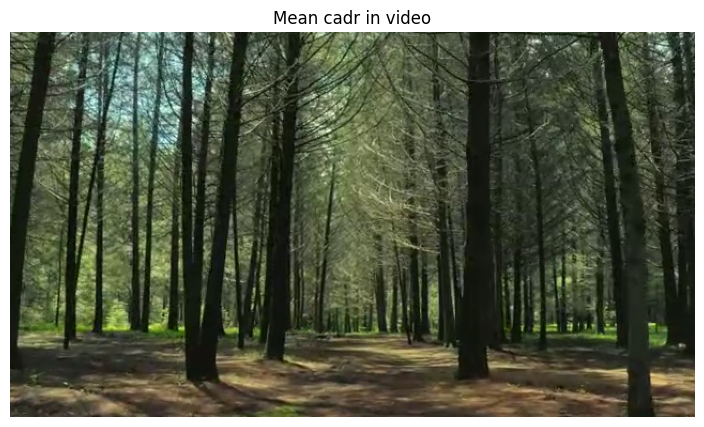

caption: a forest with lots of trees and grass


In [14]:
import cv2, os
from PIL import Image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

vid_path = '/content/automated-video-captioning/test_videos/109.mp4'
cap = cv2.VideoCapture(vid_path)
cap.set(cv2.CAP_PROP_POS_FRAMES, int(cap.get(cv2.CAP_PROP_FRAME_COUNT))/2)
ret, frame = cap.read()
if not ret:
    frame = np.zeros((224, 224, 3), dtype=np.uint8)  # Запасной вариант
frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
frame = Image.fromarray(frame)

plt.figure(figsize=(10, 5))
plt.imshow(frame)
plt.title(f"Mean cadr in video")
plt.axis('off')
plt.show()

cap.release()

# Генерация описания
inputs = processor(frame, return_tensors="pt")
outputs = model.generate(**inputs, max_length=50)
caption = processor.decode(outputs[0], skip_special_tokens=True)

print(f"caption: {caption}")

In [ ]:
import cv2, os
from PIL import Image
import numpy as np
import pandas as pd

all_filenames = []
all_captions = []

for id, row in test_df.iterrows():
    all_filenames.append(row['file_name'])
    vid_path = os.path.join(video_dir, row['file_name'])
    cap = cv2.VideoCapture(vid_path)
    cap.set(cv2.CAP_PROP_POS_FRAMES, int(cap.get(cv2.CAP_PROP_FRAME_COUNT))/2)
    ret, frame = cap.read()
    if not ret:
        frame = np.zeros((224, 224, 3), dtype=np.uint8)  # Запасной вариант
    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    frame = Image.fromarray(frame)

    cap.release()
    # Загрузка изображения
    #image = frame.convert("RGB")

    # Генерация описания
    inputs = processor(frame, return_tensors="pt")
    outputs = model.generate(**inputs, max_length=50)
    caption = processor.decode(outputs[0], skip_special_tokens=True)

    all_captions.append(caption)
    print(f"{id + 1}/{test_df.shape[0]} - caption: {caption}")

In [ ]:
import pandas as pd
submission_df = pd.DataFrame({'index': list(range(len(all_filenames))), 'file_name': all_filenames, 'caption': all_captions})
submission_df.to_csv('submission.csv', index=False)

In [ ]:
submission_df.head()

,index,file_name,caption
0,0,0.mp4,a woman in a white shirt and black pants
1,1,1.mp4,a woman in a car with a red light
2,2,2.mp4,a truck drives along a highway in the countryside
3,3,3.mp4,aerial view of the mountains and valleys of th...
4,4,4.mp4,a car ' s side mirror


In [5]:
import torch
import pandas as pd
import numpy as np

device = "cuda" if torch.cuda.is_available() else "cpu"
train_csv_path = "/content/automated-video-captioning/train.csv"
test_csv_path = "/content/automated-video-captioning/test.csv"
train_dir = "/content/automated-video-captioning/train_videos"
test_dir = '/content/automated-video-captioning/test_videos'

In [6]:
train_csv = pd.read_csv(train_csv_path)
test_csv = pd.read_csv(test_csv_path)

In [9]:
import cv2
from torch.utils.data import Dataset
from PIL import Image
import os

class VideoCaptioningDataset(Dataset):
    def __init__(self, dataframe, video_dir, transform=None, mode='train', processor=None):
        self.dataframe = dataframe.reset_index(drop=True)
        self.video_dir = video_dir
        self.transform = transform
        self.mode = mode
        self.processor = processor

    def __len__(self):
        return len(self.dataframe)

    def __getitem__(self, idx):
        row = self.dataframe.iloc[idx]
        vid_path = os.path.join(self.video_dir, row['file_name'])
        cap = cv2.VideoCapture(vid_path)
        total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
        middle_frame_idx = total_frames // 2

        cap.set(cv2.CAP_PROP_POS_FRAMES, middle_frame_idx)
        ret, frame = cap.read()
        cap.release()

        if not ret:
            raise ValueError(f"Не удалось загрузить кадр из видео: {self.video_paths[idx]}")

        # Конвертируем в PIL Image
        frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        image = Image.fromarray(frame_rgb)

        if self.mode in ['train', 'val']:
            # Токенизация текста и изображения
            inputs = self.processor(
                images=image,
                text=row['caption'],
                return_tensors="pt",
                padding="max_length",
                truncation=True,
                max_length=32,
            )

            return {
                "pixel_values": inputs["pixel_values"].squeeze(),
                "input_ids": inputs["input_ids"].squeeze(),
                "attention_mask": inputs["attention_mask"].squeeze(),
                "labels": inputs["input_ids"].squeeze()
            }
        else:
            # Токенизация текста и изображения
            inputs = self.processor(
                images=image,
                #text=row['caption'],
                return_tensors="pt",
                padding="max_length",
                truncation=True,
                max_length=32,
            )

            return {
                "pixel_values": inputs["pixel_values"].squeeze(),
                "video_path": row['file_name'],
            }

In [10]:
from torch.utils.data import DataLoader
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import cv2

train_dataset = VideoCaptioningDataset(train_csv,  video_dir=train_dir, processor=processor, mode='train')
train_loader = DataLoader(train_dataset, batch_size=8, shuffle=True)

#val_dataset = VideoDataset(val_encoded_csv,  video_dir=train_dir, processor=processor, mode='val')
#val_loader = DataLoader(val_dataset, batch_size=8, shuffle=True)

test_dataset = VideoCaptioningDataset(test_csv, video_dir=test_dir, processor=processor, mode='test')
test_loader = DataLoader(test_dataset, batch_size=4, shuffle=False)

In [19]:
for i in train_loader:
  print(i['pixel_values'].shape)
  print(i['input_ids'].shape)
  print(i['attention_mask'].shape)
  break

torch.Size([8, 3, 384, 384])
torch.Size([8, 32])
torch.Size([8, 32])


In [20]:
for i in test_loader:
  print(i['pixel_values'].shape)
  break

torch.Size([4, 3, 384, 384])


In [21]:
import os

os.chdir('/content/drive/MyDrive/blip')

In [11]:
from transformers import TrainingArguments, Trainer
import torch

training_args = TrainingArguments(
    output_dir="/content/drive/MyDrive/blip",
    per_device_train_batch_size=8,
    num_train_epochs=3,
    save_steps=10,
    logging_steps=1,
    learning_rate=5e-5,
    remove_unused_columns=False,  # Важно для image-captioning!
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,  # Созданный ранее датасет
)

trainer.train(resume_from_checkpoint=True)

ValueError: Can't find a valid checkpoint at /content/drive/MyDrive/blip/checkpoint-140

In [ ]:
model.eval()  # Переводим модель в режим оценки
predictions = []
test_video_paths = []

with torch.no_grad():
    for batch in test_loader:
        # Переносим данные на устройство (GPU, если доступно)
        pixel_values = batch["pixel_values"].to(model.device)
        batch_paths = batch["video_path"]

        # Генерация описаний
        outputs = model.generate(pixel_values=pixel_values, max_length=50)

        # Декодируем предсказания
        batch_preds = processor.batch_decode(outputs, skip_special_tokens=True)
        predictions.extend(batch_preds)
        test_video_paths.extend(batch_paths)

In [ ]:
import pandas as pd

submission_df = pd.DataFrame(columns=['index', 'file_name', 'caption'])

for video_path, pred in zip(test_video_paths, predictions):
    print(f"Видео: {video_path} | Описание: {pred}")
    submission_df.loc[len(submission_df)] = [video_path, pred]

submission_df.to_csv('submission.csv', index=False)

In [ ]:
submission_df.head()

## Тренсформер video-to-text + обучение

In [ ]:
!pip install transformers torch accelerate

In [ ]:
import cv2
from PIL import Image

def extract_frames(video_path, num_frames=8):
    cap = cv2.VideoCapture(video_path)
    frames = []
    total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    frame_indices = [i * (total_frames // num_frames) for i in range(num_frames)]

    for idx in frame_indices:
        cap.set(cv2.CAP_PROP_POS_FRAMES, idx)
        ret, frame = cap.read()
        if ret:
            frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
            frames.append(Image.fromarray(frame_rgb))
    return frames

video_frames = extract_frames("/content/automated-video-captioning/test_videos/106.mp4")

In [ ]:
from transformers import Blip2Processor, BlipForConditionalGeneration
import torch
from PIL import Image

# Загрузка модели и процессора
model_id = "kpyu/video-blip-opt-2.7b-ego4d"
#processor = Blip2Processor.from_pretrained(model_id)
#model = BlipForConditionalGeneration.from_pretrained(model_id)

Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.52, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.
/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(
You are using a model of type blip-2 to instantiate a model of type blip. This is not supported for all configurations of models and can yield errors.


Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

Some weights of BlipForConditionalGeneration were not initialized from the model checkpoint at kpyu/video-blip-opt-2.7b-ego4d and are newly initialized: ['text_decoder.bert.embeddings.LayerNorm.bias', 'text_decoder.bert.embeddings.LayerNorm.weight', 'text_decoder.bert.embeddings.position_embeddings.weight', 'text_decoder.bert.embeddings.word_embeddings.weight', 'text_decoder.bert.encoder.layer.0.attention.output.LayerNorm.bias', 'text_decoder.bert.encoder.layer.0.attention.output.LayerNorm.weight', 'text_decoder.bert.encoder.layer.0.attention.output.dense.bias', 'text_decoder.bert.encoder.layer.0.attention.output.dense.weight', 'text_decoder.bert.encoder.layer.0.attention.self.key.bias', 'text_decoder.bert.encoder.layer.0.attention.self.key.weight', 'text_decoder.bert.encoder.layer.0.attention.self.query.bias', 'text_decoder.bert.encoder.layer.0.attention.self.query.weight', 'text_decoder.bert.encoder.layer.0.attention.self.value.bias', 'text_decoder.bert.encoder.layer.0.attention.self

In [ ]:
# Пример загрузки видео (ключевые кадры)
#video_frames = [Image.open(f"frame_{i}.jpg") for i in range(8)]  # 8 кадров

# Препроцессинг
inputs = processor(
    image=video_frames,
    #text="Опиши, что происходит на видео",  # Опционально (для VQA)
    return_tensors="pt",
    padding=True,
    truncation=True,
)

# Генерация описания
with torch.no_grad():
    outputs = model.generate(**inputs, max_length=50)

# Декодирование
caption = processor.decode(outputs[0], skip_special_tokens=True)
print("Описание:", caption)

AttributeError: 'BlipTextLayer' object has no attribute 'crossattention'

In [ ]:
outputs = model.generate(
    **inputs,
    max_length=100,          # Максимальная длина описания
    num_beams=5,             # Beam search (улучшает качество)
    temperature=0.7,         # "Творчество" (меньше = более предсказуемо)
    early_stopping=True,     # Остановка при завершении генерации
)

In [ ]:
'''
#json
[
    {"video_path": "video1.mp4", "caption": "человек играет в футбол"},
    {"video_path": "video2.mp4", "caption": "кошка спит на диване"}
]
'''

In [ ]:
from transformers import Trainer, TrainingArguments

training_args = TrainingArguments(
    output_dir="./video-blip-finetuned",
    per_device_train_batch_size=2,
    num_train_epochs=3,
    save_steps=500,
    logging_steps=100,
    learning_rate=5e-5,
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,  # Кастомный Dataset
)
trainer.train()

trainer.state.log_history

## Графики + аналитика

In [ ]:
import matplotlib.pyplot as plt

# Получаем историю обучения
history = trainer.state.log_history

# Извлекаем значения loss (обязательно проверяем наличие ключа)
train_loss = [log['loss'] for log in history if 'loss' in log]
epochs = list(range(1, len(train_loss)+1))

# Строим график
plt.figure(figsize=(10, 5))
plt.plot(epochs, train_loss, 'b-o', label='Training Loss')
plt.title('Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()

In [ ]:
def plot_training_metrics(trainer):
    history = trainer.state.log_history

    if not history:
        print("No training history available!")
        return

    # Подготовка данных
    train_loss = []
    eval_metrics = {'bleu': [], 'cider': []}  # Пример для BLEU и CIDEr

    for log in history:
        if 'loss' in log:
            train_loss.append(log['loss'])
        if 'eval_bleu' in log:  # Если вы вычисляли эти метрики
            eval_metrics['bleu'].append(log['eval_bleu'])
            eval_metrics['cider'].append(log['eval_cider'])

    # Построение графиков
    plt.figure(figsize=(15, 5))

    # График потерь
    plt.subplot(1, 2, 1)
    plt.plot(train_loss, 'b-o')
    plt.title('Training Loss')
    plt.xlabel('Steps' if 'step' in history[0] else 'Epochs')

    # График метрик (если есть)
    if eval_metrics['bleu']:
        plt.subplot(1, 2, 2)
        plt.plot(eval_metrics['bleu'], 'g-^', label='BLEU-4')
        plt.plot(eval_metrics['cider'], 'm-s', label='CIDEr')
        plt.title('Validation Metrics')
        plt.legend()

    plt.tight_layout()
    plt.show()

# Вызов функции
plot_training_metrics(trainer)